![image](images/how.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/997162b5cae941f08ac3d3e6ebab504e

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
# la otra forma, pero con mismo resultado: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### para que funcione necesitas bajarte los archivos de datos de Kaggle :) 
df = pd.read_csv(r"C:\Users\andre\Desktop\Daily_tasks\Kaggle_competition\data\train_set.csv")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99997,69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99998,204442,32,f,9,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


<AxesSubplot:>

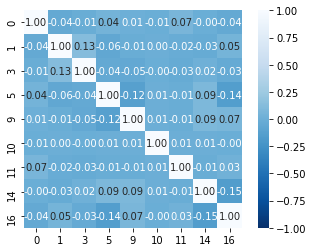

In [3]:
df_corr = df.corr()
df_corr
sns.heatmap(df_corr,  annot=True, fmt='.2f', square=True, cmap='Blues_r',vmin=-1, vmax=1)

In [4]:
columns_meaning=pd.read_csv(r"C:\Users\andre\Desktop\Daily_tasks\Kaggle_competition\data\columns_meaning.csv")
columns_meaning

,Column,Description
0,0,Case_ID registered in Hospital
1,1,Unique code for the Hospital
2,2,Unique code for the type of Hospital
3,3,City Code of the Hospital
4,4,Region Code of the Hospital
5,5,Number of Extra rooms available in the Hospital
6,6,Department overlooking the case
7,7,Code for the Ward type
8,8,Code for the Ward Facility
9,9,Condition of Bed in the Ward


In [5]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


(100000, 18)

In [6]:
df.columns.isna().sum()

0

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [8]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí
#df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

In [9]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 
df.fillna("0",inplace = True)

#### 1. Definir X e y

In [10]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df[["1","3","5","9"]])
y = np.array(df['17'])
X.shape

(100000, 4)

In [11]:
y.shape

(100000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
X_train

array([[19, 7, 4, 2.0],
       [24, 1, 2, 2.0],
       [1, 10, 3, 2.0],
       ...,
       [32, 9, 3, 3.0],
       [29, 4, 3, 3.0],
       [26, 2, 2, 3.0]], dtype=object)

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [14]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [15]:
model.fit(X_train, y_train)

LogisticRegression()

#### 5. Predecir con el modelo ya entrenado con X_test

In [20]:
predictions = model.predict(X_test)
print(predictions)

['21-30' '21-30' '21-30' ... '21-30' '21-30' '11-20']


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

              0-10       0.00      0.00      0.00      1502
             11-20       0.27      0.42      0.33      4946
             21-30       0.31      0.70      0.43      5477
             31-40       0.00      0.00      0.00      3418
             41-50       0.00      0.00      0.00       714
             51-60       0.00      0.00      0.00      2230
             61-70       0.00      0.00      0.00       180
             71-80       0.00      0.00      0.00       668
             81-90       0.00      0.00      0.00       274
            91-100       0.00      0.00      0.00       171
More than 100 Days       0.00      0.00      0.00       420

          accuracy                           0.29     20000
         macro avg       0.05      0.10      0.07     20000
      weighted avg       0.15      0.29      0.20     20000



#### 6. Sacar métricas, valorar el modelo 

In [27]:
model.score(X_test,y_test)

0.2984

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [28]:
to_pred = pd.read_csv(r"C:\Users\andre\Desktop\Daily_tasks\Kaggle_competition\data\test_set.csv")

In [29]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [30]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred = to_pred.fillna(0)

In [31]:
predictions_submit = model.predict(to_pred[["1","3","5","9"]])
predictions_submit

array(['21-30', '21-30', '11-20', ..., '21-30', '21-30', '21-30'],
      dtype=object)

In [32]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,21-30
1,208989,21-30
2,305872,11-20
3,266099,21-30
4,13228,21-30
...,...,...
133739,318155,21-30
133740,144850,21-30
133741,180676,21-30
133742,39933,21-30


In [33]:
sample = pd.read_csv(r"C:\Users\andre\Desktop\Daily_tasks\Kaggle_competition\data\sample_submission.csv")

In [34]:
sample.shape

(133744, 2)

In [35]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv(r"C:\Users\andre\Desktop\Daily_tasks\Kaggle_competition\data\to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
